In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV

In [5]:
df=pd.read_excel("premiums.xlsx")
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [6]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [7]:
df.columns=df.columns.str.replace(" ","_").str.lower()

In [8]:
df.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053


Handle NA values

In [10]:
df.isna().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [11]:
df.dropna(inplace=True)

Checking Dublicate in Dataset

In [13]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [14]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [15]:
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([-3, -1])

In [16]:
df.number_of_dependants=abs(df.number_of_dependants)

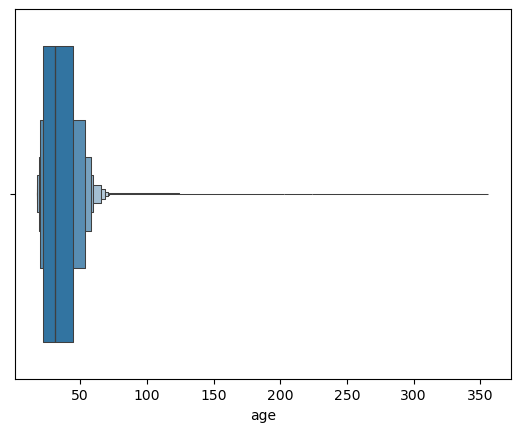

In [17]:
sns.boxenplot(data=df ,x="age")
plt.show()

getting the numerical columns from the dataset

In [19]:
numeric_columns=df.select_dtypes(['float64','int64']).columns

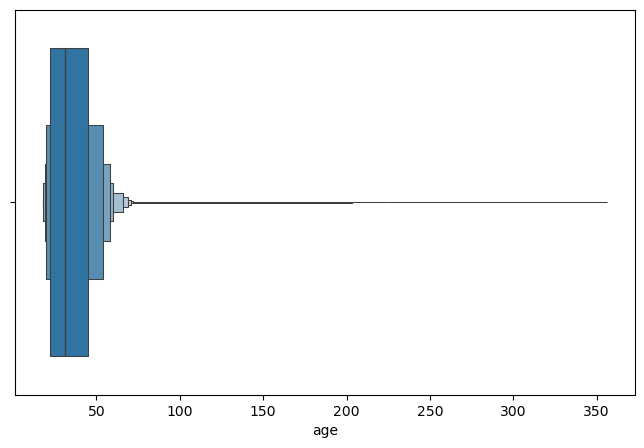

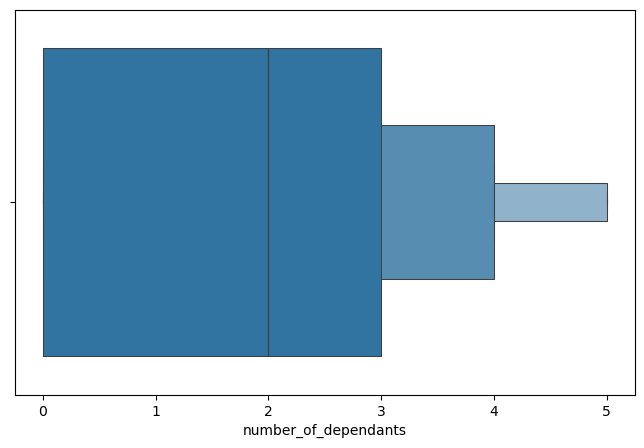

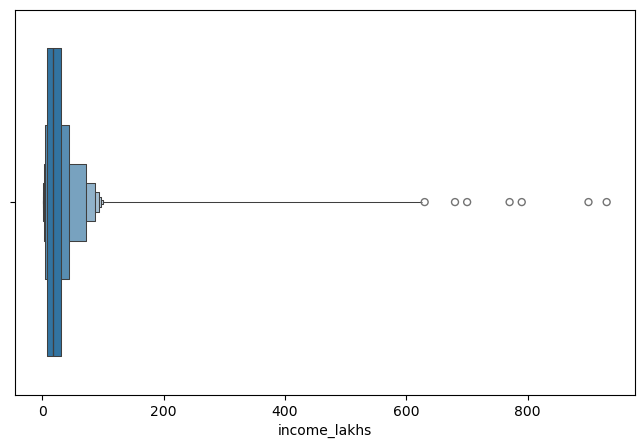

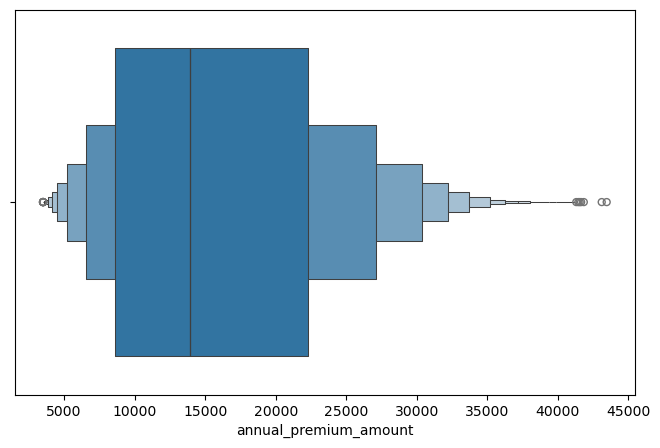

In [20]:
for col in numeric_columns:
    plt.figure(figsize=(8,5))
    sns.boxenplot(data=df ,x=col)
    plt.show()
    

In [21]:
df[df.age>100]['age'].unique()

array([224, 124, 136, 203, 356])

In [22]:
df1= df[df.age<=100].copy()

In [23]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49918.000000,49918.000000,49918.000000,49918.000000
mean,34.401839,1.717617,23.025141,15766.589286
std,13.681600,1.492074,24.227912,8419.137327
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,930.000000,43471.000000


Appying the quantile with income_lakhs column

In [25]:
df1.income_lakhs.quantile([0.25,0.75])

0.25     7.0
0.75    31.0
Name: income_lakhs, dtype: float64

In [26]:
def get_iqr_bounds(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return lower_bound , upper_bound

In [27]:
get_iqr_bounds(df1.income_lakhs)

(-29.0, 67.0)

In [28]:
quantite_threshold=df1.income_lakhs.quantile(0.999)

In [29]:
df2=df1[df1.income_lakhs<=quantite_threshold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49908.000000,49908.000000,49908.000000,49908.000000
mean,34.401579,1.717640,22.889897,15765.739641
std,13.681604,1.492032,22.170699,8418.674061
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22270.500000
max,72.000000,5.000000,100.000000,43471.000000


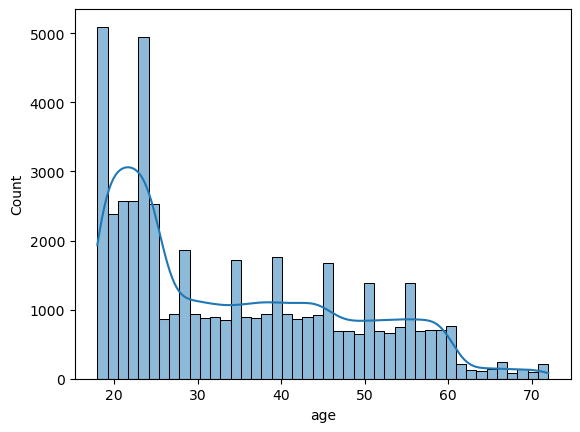

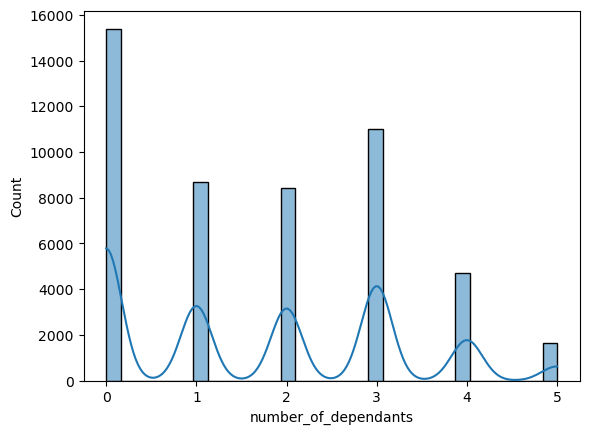

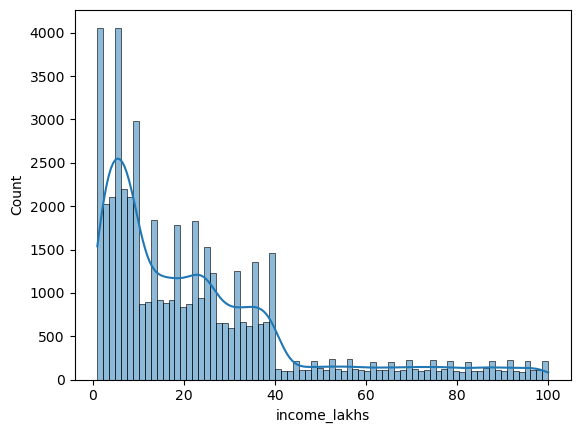

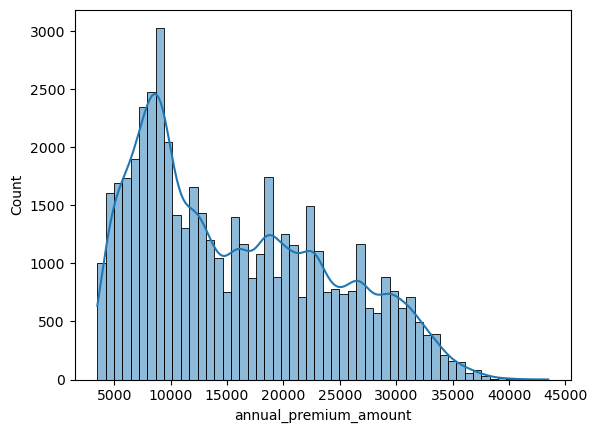

In [30]:
for col in numeric_columns:
    sns.histplot(df2[col], kde=True)
    plt.show()

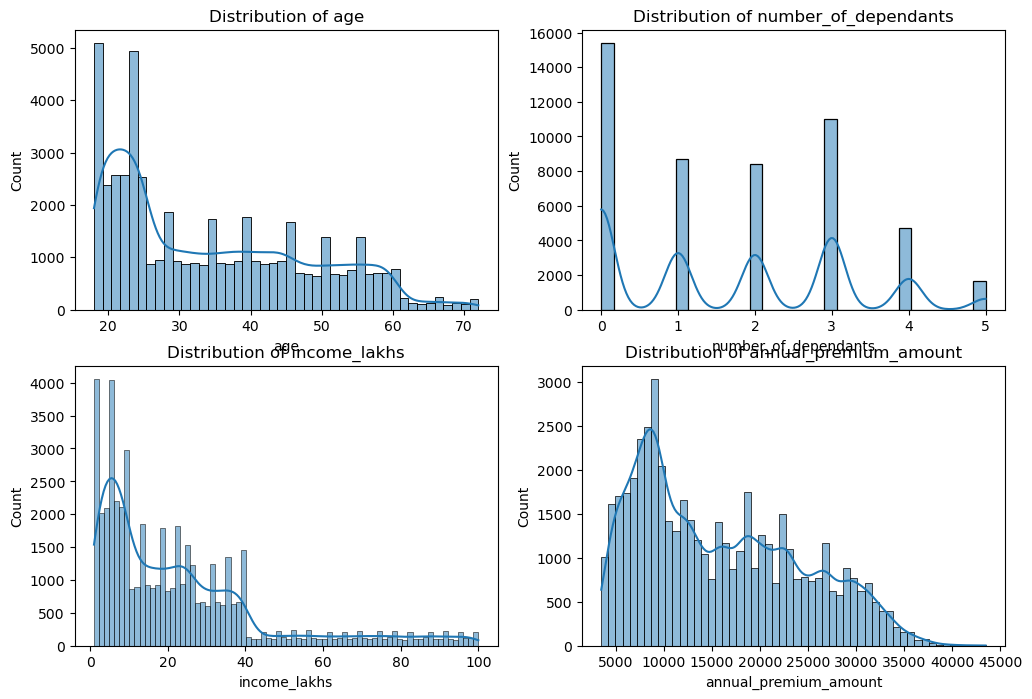

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(numeric_columns[:4]):
    sns.histplot(df2[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

<Axes: xlabel='age', ylabel='annual_premium_amount'>

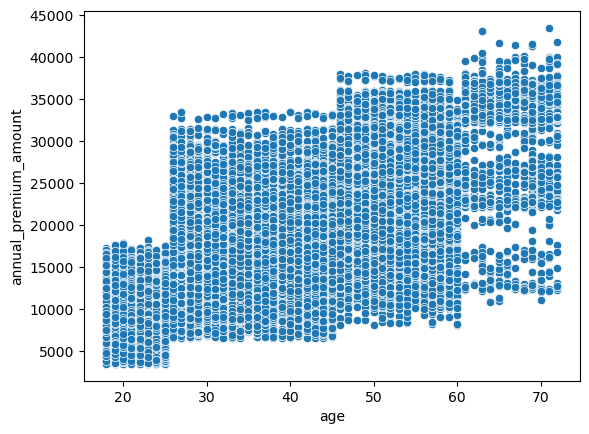

In [32]:
sns.scatterplot(df2,x="age",y="annual_premium_amount")

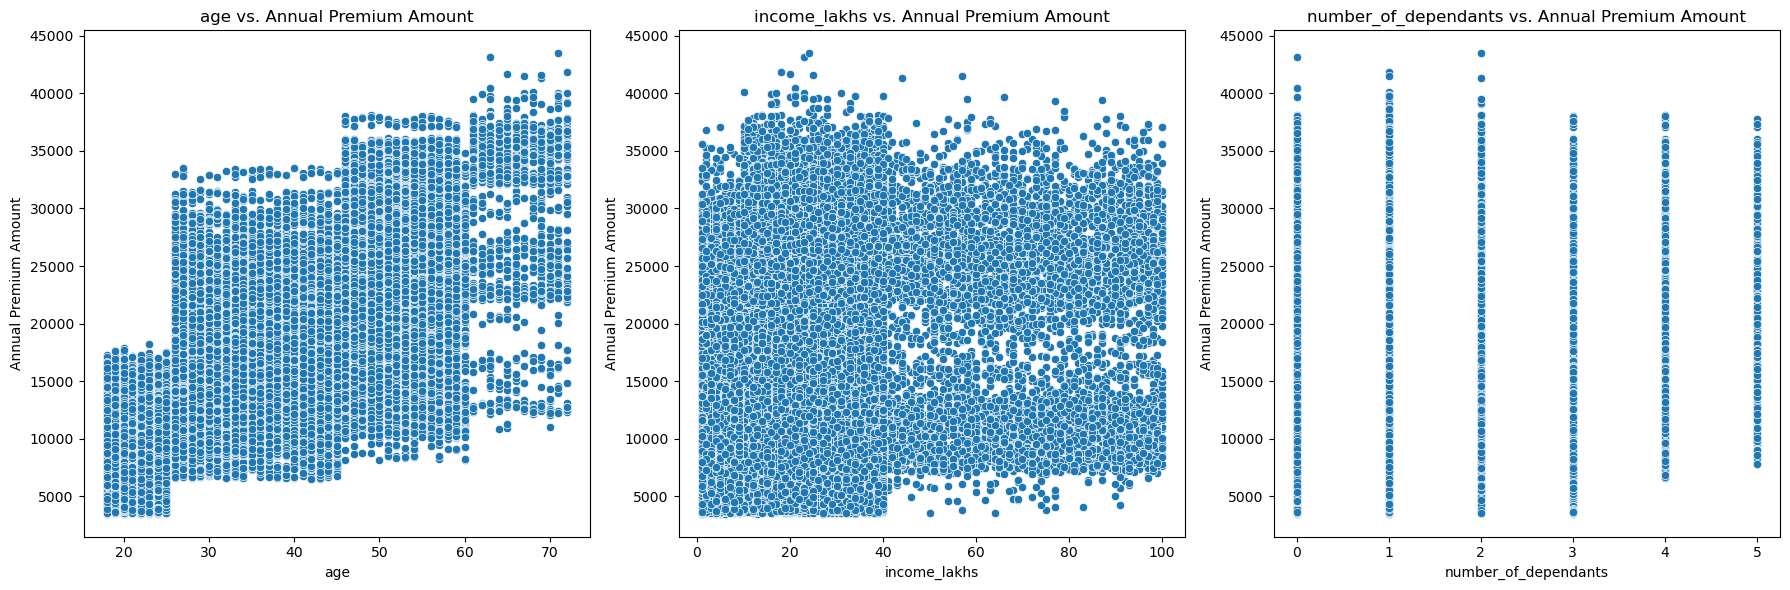

In [33]:
numeric_features = ['age', 'income_lakhs', 'number_of_dependants']

fig, axes = plt.subplots(1, len(numeric_features), figsize=(18, 6))  # Adjust figure size as necessary

for ax, column in zip(axes, numeric_features):
    sns.scatterplot(x=df2[column], y=df2['annual_premium_amount'], ax=ax)
    ax.set_title(f'{column} vs. Annual Premium Amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout()  # Adjust layout
plt.show()

In [34]:
string_columns = df2.select_dtypes(include='object').columns

In [35]:
string_columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [36]:
for col in string_columns:
    print(col, ":", df2[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [37]:
df2.smoking_status.replace(
    {
        'Smoking=0' : "No Smoking",
        'Does Not Smoke' : "No Smoking",
        'Not Smoking' : "No Smoking"
    }
    ,inplace=True
)

/tmp/ipykernel_1044315/1491598633.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2.smoking_status.replace(


In [38]:
df2.smoking_status.unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [39]:
pct_count=df2.gender.value_counts(normalize=True)

In [40]:
pct_count

gender
Male      0.549631
Female    0.450369
Name: proportion, dtype: float64

<Axes: xlabel='gender'>

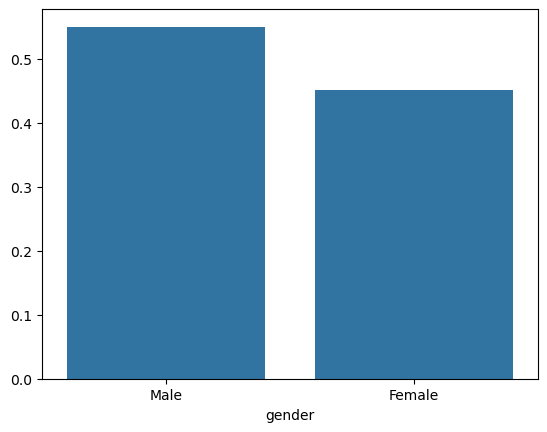

In [41]:
sns.barplot(x=pct_count.index,y=pct_count.values)

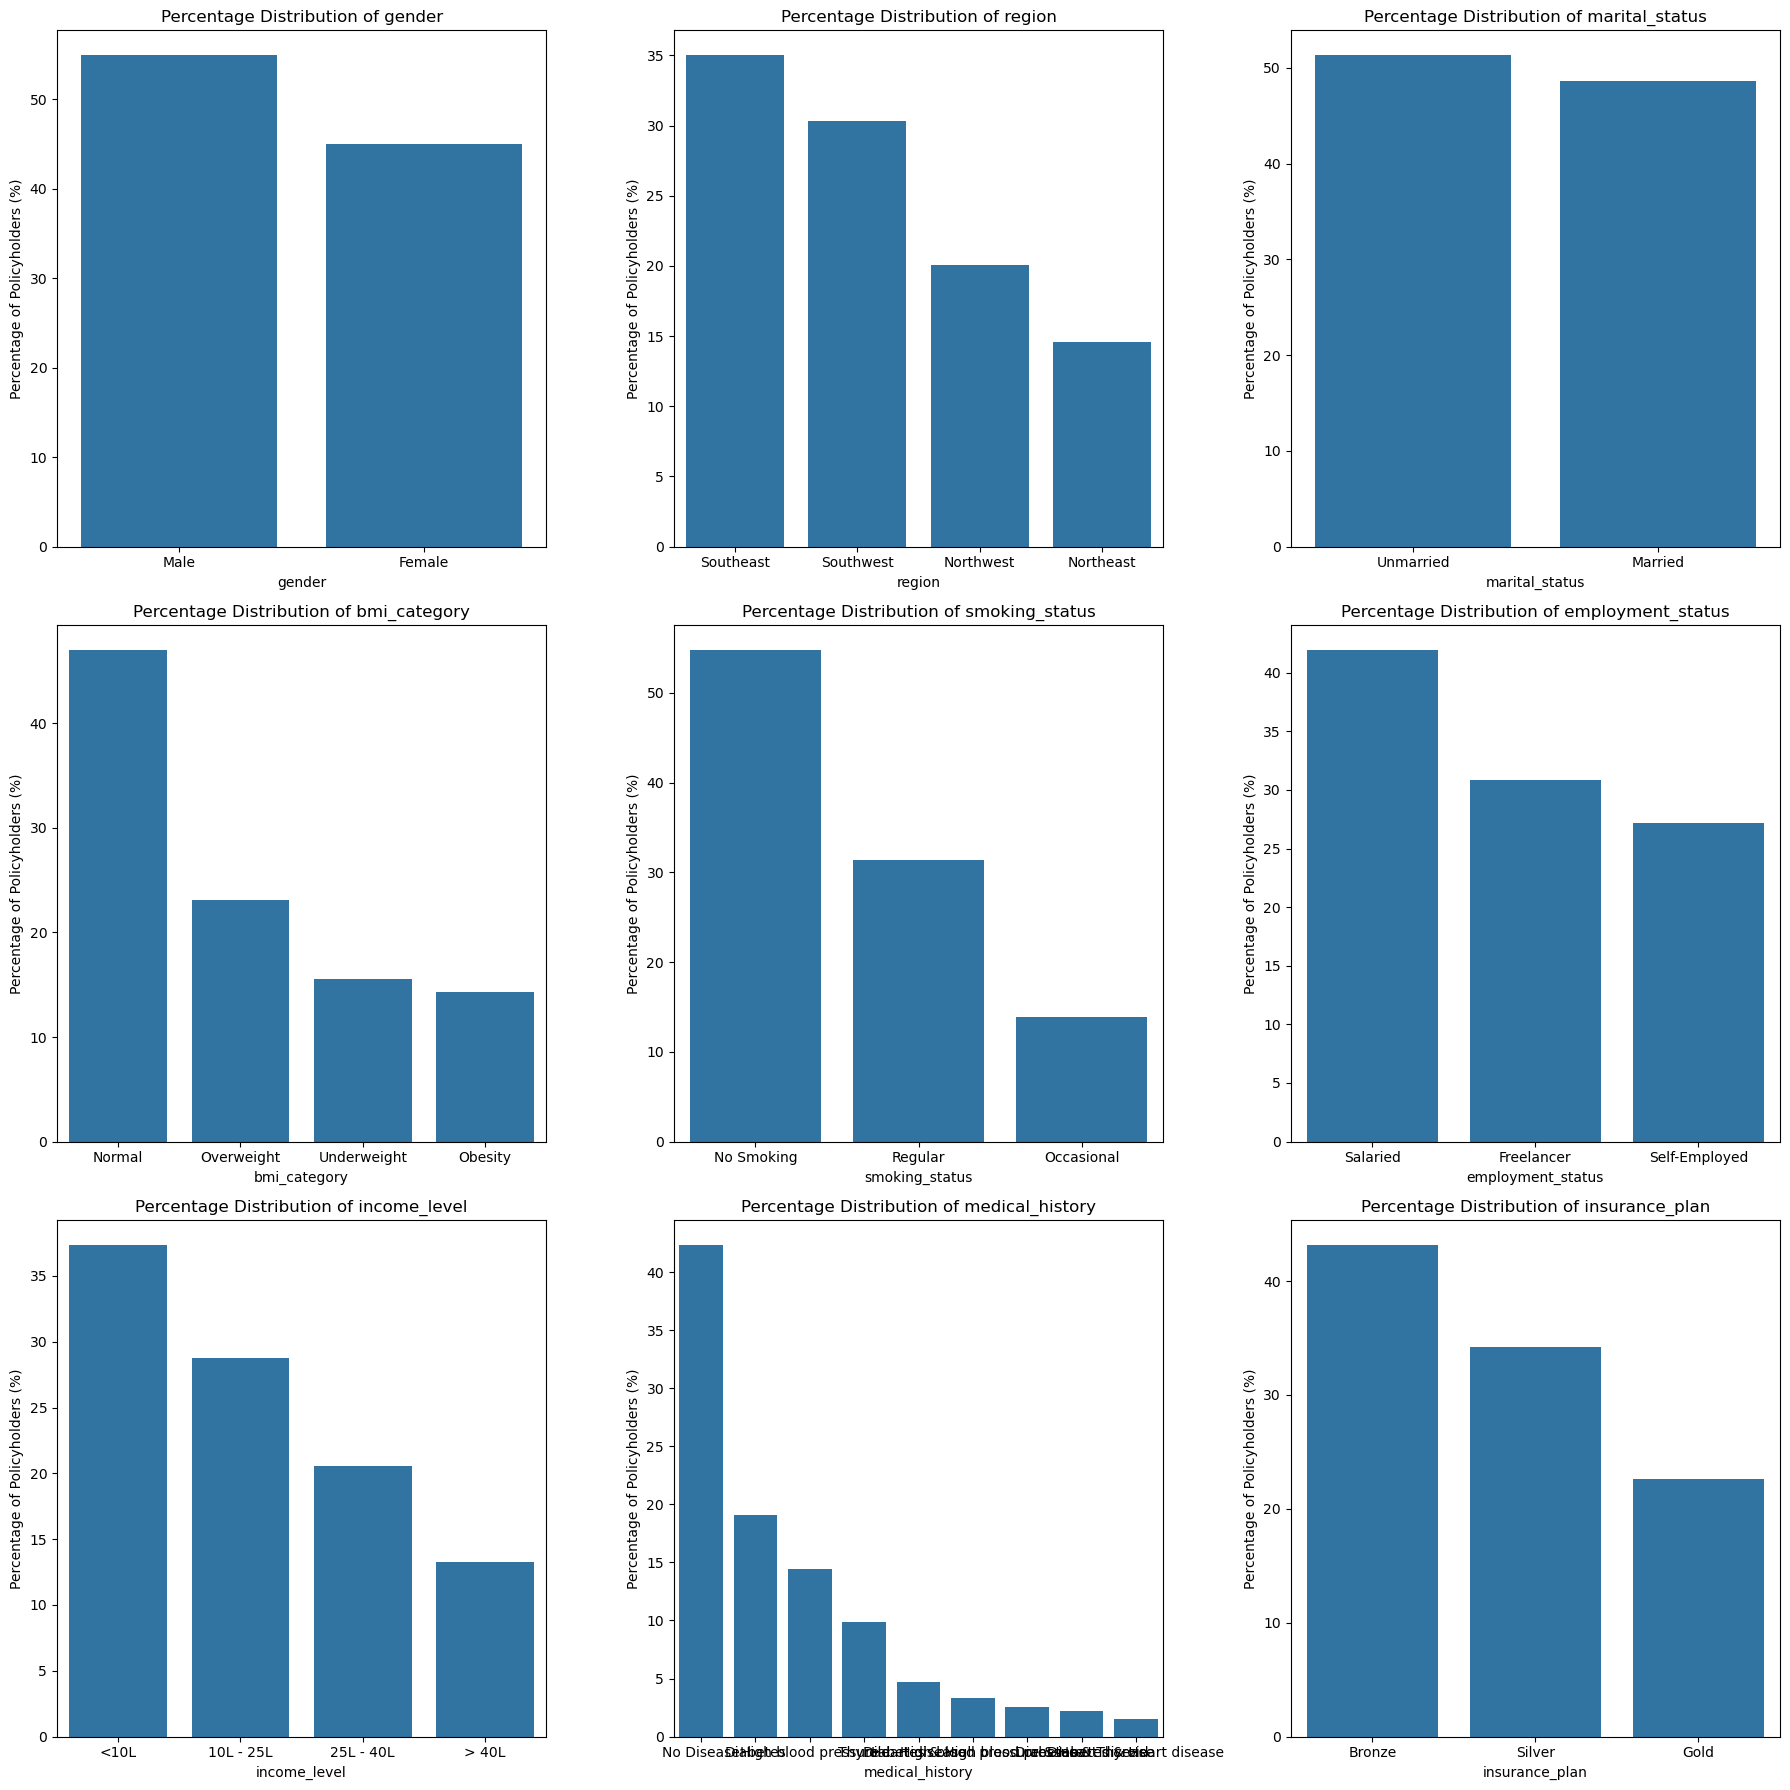

In [42]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))  # Adjust figure size as necessary
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

for ax, column in zip(axes, string_columns):
    # Calculate the percentage distribution of each category
    category_counts = df2[column].value_counts(normalize=True) * 100  # normalize=True gives the relative frequencies
    
    # Plotting the distribution using barplot
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.set_xlabel(column)  # Set xlabel to the column name for clarity

plt.tight_layout()  # Adjusts plot parameters for better fit in the figure window
plt.show()

In [43]:
cross_tab=pd.crosstab(df2.income_level, df2.insurance_plan)
cross_tab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,5307,3880,5182
25L - 40L,3683,2840,3750
<10L,12226,931,5486
> 40L,329,3653,2641


<Axes: xlabel='income_level'>

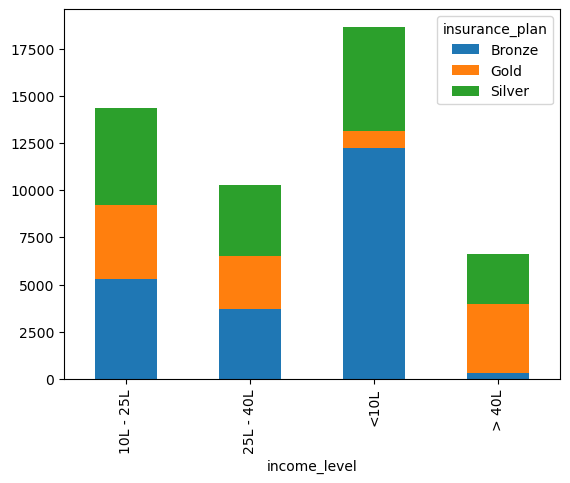

In [44]:
cross_tab.plot(kind="bar",stacked=True)

<Axes: xlabel='income_level', ylabel='count'>

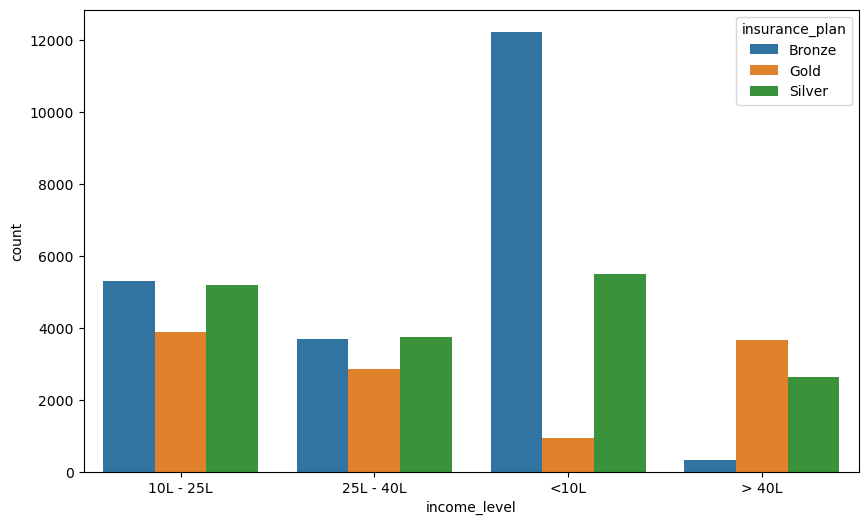

In [45]:
cross_tab_reset = cross_tab.reset_index()

# Melt the DataFrame to long format
cross_tab_melted = cross_tab_reset.melt(id_vars='income_level', var_name='insurance_plan', value_name='count')

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=cross_tab_melted, x='income_level', y='count', hue='insurance_plan')

<Axes: xlabel='insurance_plan', ylabel='income_level'>

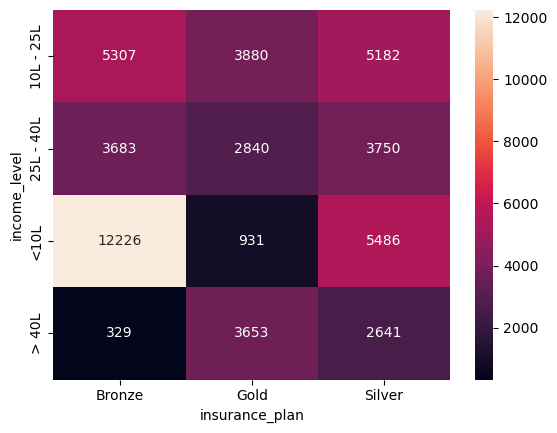

In [46]:
sns.heatmap(cross_tab,annot=True,fmt="d")

In [47]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [48]:
risk_scores={
    "diabetes" :6,
    "heart disease" : 8,
    "high blood pressure":6,
    "thyroid" : 5,
    "no disease" : 0,
    "none" :0
}

In [49]:
df2["medical_history"].str.split(" & ",expand=True).apply(lambda x : x.str.lower())

,0,1
0,diabetes,None
1,diabetes,None
2,high blood pressure,None
3,no disease,None
4,high blood pressure,None
...,...,...
49995,no disease,None
49996,thyroid,None
49997,no disease,None
49998,no disease,None


In [50]:
df2[["disease1","disease2"]]=df2["medical_history"].str.split(" & ",expand=True).apply(lambda x : x.str.lower())

In [51]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,None
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,None


In [52]:
df2["disease1"].fillna('none',inplace=True)
df2["disease2"].fillna('none',inplace=True)
df2['total_risk_score']=0

/tmp/ipykernel_1044315/3320853866.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["disease1"].fillna('none',inplace=True)
/tmp/ipykernel_1044315/3320853866.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [53]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,0


In [54]:
for disease in ["disease1", "disease2"]:
    print(disease)
    df2["total_risk_score"]+= df2[disease].map(risk_scores)
    print(df2["total_risk_score"].sample(10))

disease1
24683    0
41735    5
25781    0
36150    6
34447    6
2491     6
7916     0
47229    0
20778    6
20750    6
Name: total_risk_score, dtype: int64
disease2
35996    6
16953    0
35300    0
7343     0
6121     0
36013    6
1287     0
41966    0
45537    0
34876    0
Name: total_risk_score, dtype: int64


In [55]:
df2["disease1"].unique()

array(['diabetes', 'high blood pressure', 'no disease', 'thyroid',
       'heart disease'], dtype=object)

In [56]:
df2["disease2"].unique()

array(['none', 'high blood pressure', 'heart disease', 'thyroid'],
      dtype=object)

Normalizing the risk score : min max scaling

In [58]:
max_score=df2["total_risk_score"].max()
print(max_score)
min_score=df2["total_risk_score"].min()
print(min_score)
df2["normalized_rsk_score"]=(df2["total_risk_score"]-min_score)/(max_score-min_score)
df2.head(2)

14
0


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_rsk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571


In [59]:
df2["insurance_plan"].unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [60]:
df2["insurance_plan"]=df2["insurance_plan"].map({'Bronze':1, 'Silver':2, 'Gold':3})

In [61]:
df2["insurance_plan"].unique()

array([1, 2, 3])

In [62]:
df2["income_level"].unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [63]:
df2["income_level"]=df2["income_level"].map({'<10L':1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})

In [64]:
df2["income_level"].unique()

array([1, 2, 4, 3])

In [65]:
df2.select_dtypes(include='object').columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'medical_history', 'disease1', 'disease2'],
      dtype='object')

In [66]:
nominal_cols=['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df3=pd.get_dummies(df2,columns=nominal_cols,drop_first=True,dtype=int)

In [67]:
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,diabetes,none,6,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,diabetes,none,6,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,high blood pressure,none,6,...,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,No Disease,3,20303,no disease,none,0,...,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,High blood pressure,2,13365,high blood pressure,none,6,...,0,0,1,0,1,0,0,1,0,1


In [68]:
df4=df3.drop(['disease1', 'disease2', 'total_risk_score','medical_history'],axis=1)

In [69]:
df4.shape

(49908, 19)

Correlation Analysis

<Axes: >

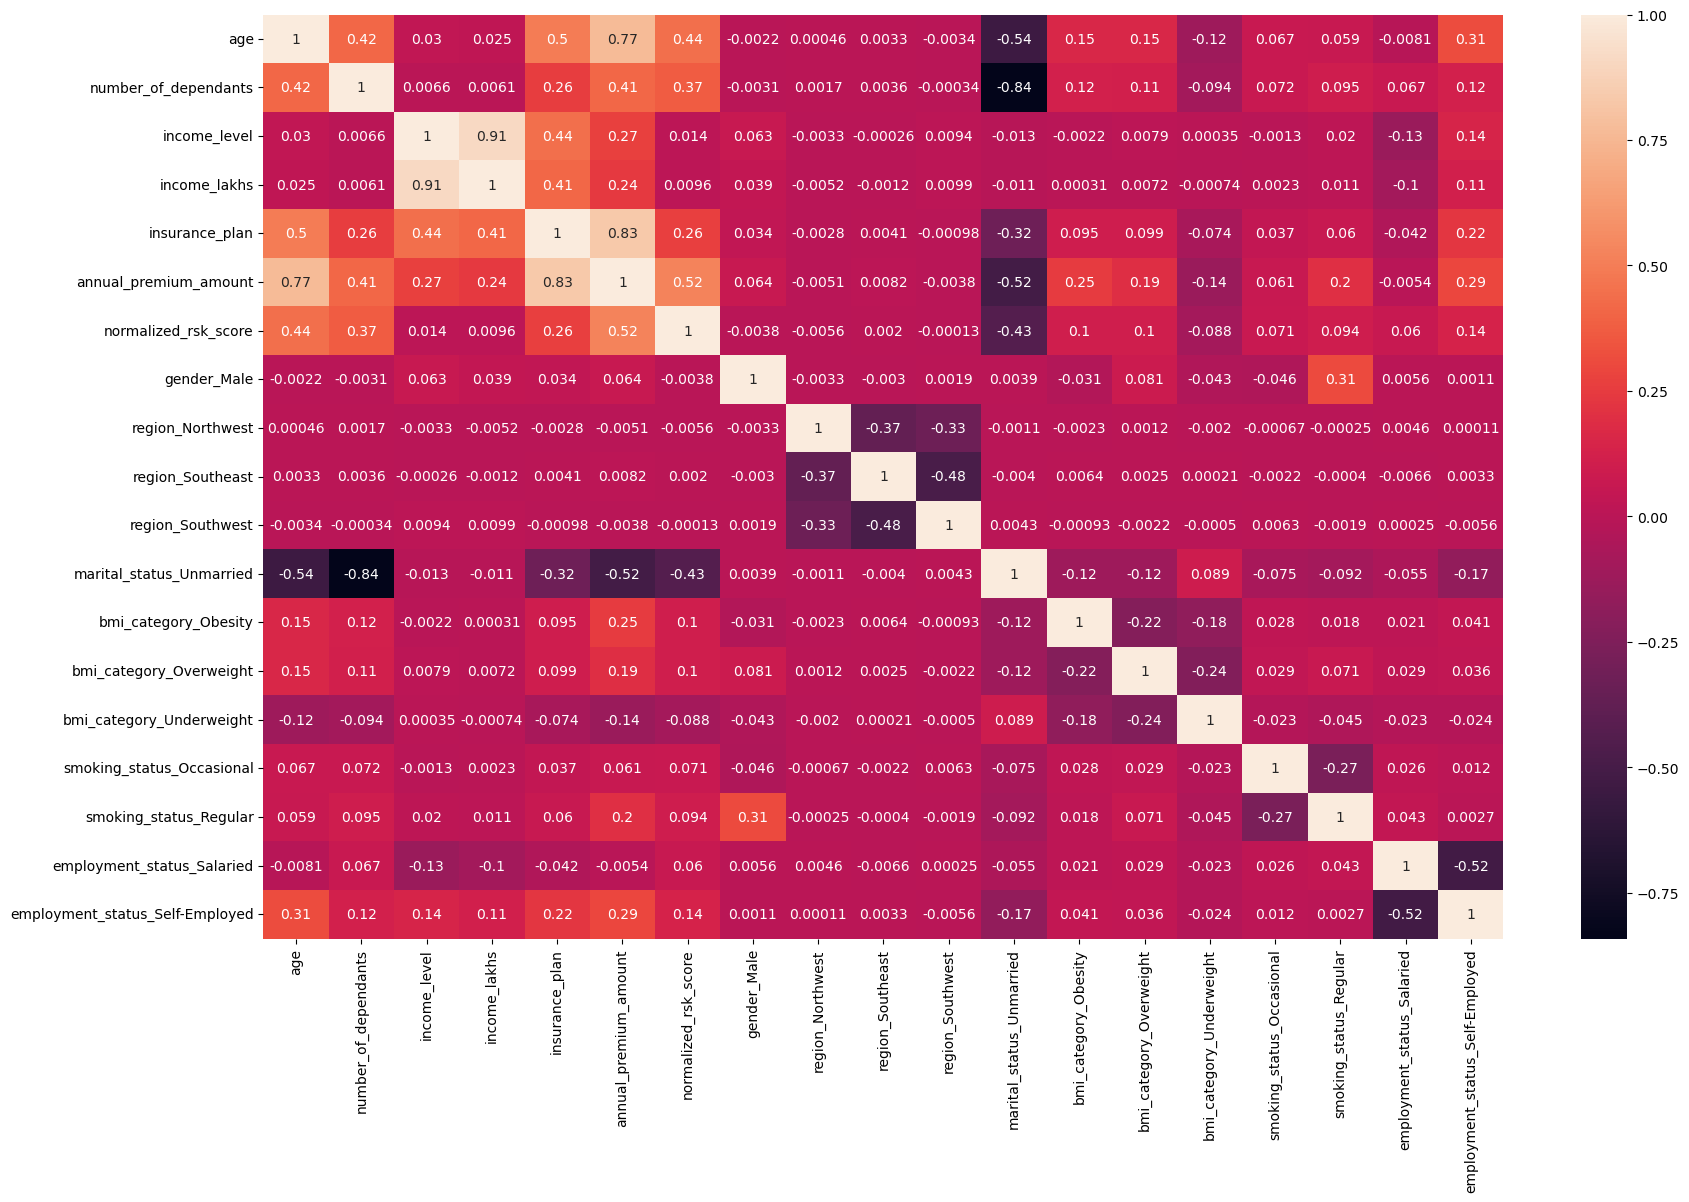

In [71]:
correlation_matrix=df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix,annot=True)

In [72]:
X=df4.drop("annual_premium_amount", axis=1)
y=df4["annual_premium_amount"]


In [73]:
df4.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'normalized_rsk_score',
       'gender_Male', 'region_Northwest', 'region_Southeast',
       'region_Southwest', 'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

In [74]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale=['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan']
scaler=MinMaxScaler()
X[cols_to_scale]=scaler.fit_transform(X[cols_to_scale])

In [75]:
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_rsk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.00000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000
mean,0.303733,0.343528,0.365900,0.221110,0.397401,0.291831,0.549631,0.20093,0.350385,0.303038,0.513545,0.143183,0.231245,0.155326,0.138274,0.313857,0.419412,0.272041
std,0.253363,0.298406,0.349711,0.223946,0.392459,0.287420,0.497536,0.40070,0.477095,0.459576,0.499822,0.350263,0.421633,0.362219,0.345191,0.464064,0.493468,0.445015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.000000,0.000000,0.060606,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240741,0.400000,0.333333,0.161616,0.500000,0.357143,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.600000,0.666667,0.303030,0.500000,0.428571,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Checking the multi correlation between features using VIF

Variance Infaltion Factor : High vif is highly multi correlation 

Dropping the column if VIF value greater than 10

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df=pd.DataFrame()
    vif_df['Column']=data.columns
    vif_df["VIF"]=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [80]:
calculate_vif(X)

,Column,VIF
0,age,4.567634
1,number_of_dependants,4.534650
2,income_level,12.450675
3,income_lakhs,11.183367
4,insurance_plan,3.584752
5,normalized_rsk_score,2.687610
6,gender_Male,2.421496
7,region_Northwest,2.102556
8,region_Southeast,2.922414
9,region_Southwest,2.670666


In [81]:
calculate_vif(X.drop("income_level",axis=1))

,Column,VIF
0,age,4.545825
1,number_of_dependants,4.526598
2,income_lakhs,2.480563
3,insurance_plan,3.445682
4,normalized_rsk_score,2.687326
5,gender_Male,2.409980
6,region_Northwest,2.100789
7,region_Southeast,2.919775
8,region_Southwest,2.668314
9,marital_status_Unmarried,3.393718


In [82]:
X_reduced= X.drop("income_level",axis=1)
X_reduced.head(2)

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_rsk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.203704,0.4,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0


Model Training

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=10)
print("X train shape ",X_train.shape)
print("X test shape ",X_test.shape)
print("y train shape ",y_train.shape)
print("y test shape ",y_test.shape)

X train shape  (34935, 17)
X test shape  (14973, 17)
y train shape  (34935,)
y test shape  (14973,)


In [85]:
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [86]:
test_score=linear_model.score(X_test,y_test)

In [87]:
train_score=linear_model.score(X_train,y_train)

In [88]:
train_score, test_score

(0.9282143576916762, 0.9280547230217837)

In [89]:
feature_importance=linear_model.coef_ 

In [90]:
linear_model.intercept_

4824.300272127086

In [91]:
coef_df=pd.DataFrame(feature_importance, index=X_test.columns,columns=['coefficient'])
coef_df=coef_df.sort_values(by='coefficient',ascending=True)

Using the below barh plot of coefficient we can identify which feature is most contributed to prediction

<BarContainer object of 17 artists>

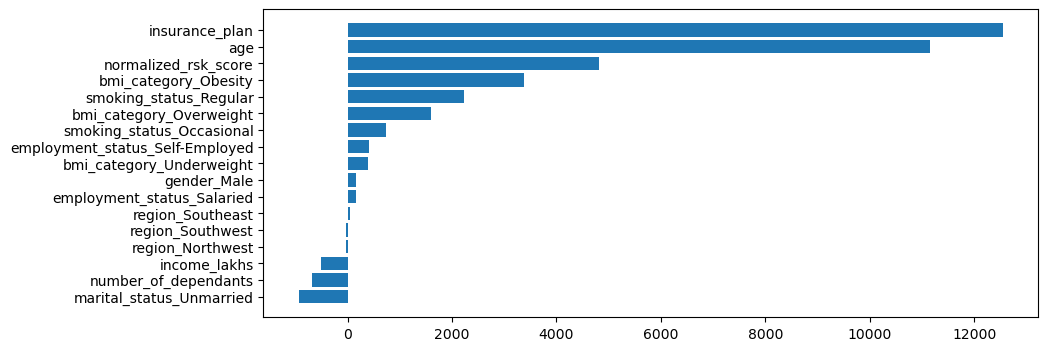

In [93]:
plt.figure(figsize=(10,4))
plt.barh(coef_df.index,coef_df.coefficient)

Small alpha (close to 0):

The regularization effect is very small, and the model behaves similarly to ordinary least squares (OLS) regression. The coefficients are less restricted.
The model might overfit the data, capturing noise rather than the underlying pattern.


Large alpha:

The regularization effect becomes stronger, forcing the model to shrink the coefficients towards zero.
This reduces the model's complexity but can lead to underfitting if alpha is too large, meaning the model might not capture the true relationships in the data.

In [94]:
ridge_model=Ridge()
ridge_model.fit(X_train,y_train)

Ridge()

In [95]:
ridge_model.score(X_test,y_test)

0.9280541644640345

In [96]:
ridge_model.score(X_train,y_train)

0.9282143198366275

In [181]:
from sklearn.linear_model import RidgeCV


alphas = [0.1, 1.0, 10.0, 100.0]
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)

# Get the best alpha
best_alpha = ridge_cv.alpha_
print("Optimal alpha:", best_alpha)


Optimal alpha: 1.0


In [183]:
ridge_cv.score(X_train,y_train)

0.9282143198366275

In [187]:
ridge_cv.score(X_test,y_test)

0.9280541644640345